In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats
import plotly
import geopandas as gpd
%matplotlib inline

In [4]:
table1 = pd.read_csv(r'data\RV_O_010_L_OK_SK.csv', sep=';')

In [5]:
table1.head(5)

,Kód okresu,Názov okresu,Pohlavie,Ekonomické vekové skupiny,Vzdelanie,abs.
0,SK0101,Okres Bratislava I,muž,predproduktívny vek (0-14 rokov),dôverné,1
1,SK0101,Okres Bratislava I,muž,predproduktívny vek (0-14 rokov),nezistené,56
2,SK0101,Okres Bratislava I,muž,predproduktívny vek (0-14 rokov),základné vzdelanie - 1. stupeň základnej školy,835
3,SK0101,Okres Bratislava I,muž,predproduktívny vek (0-14 rokov),základné vzdelanie - 2. stupeň základnej školy,2
4,SK0101,Okres Bratislava I,muž,predproduktívny vek (0-14 rokov),bez ukončeného vzdelania – osoby vo veku 0-14 ...,2671


In [6]:
table2 = pd.read_csv(r'data\RV_O_040_L_OK_SK.csv', sep=';')

In [7]:
table2.head(5)

,Kód okresu,Názov okresu,Pohlavie,Vek,Vzdelanie,Súčasná ekonomická aktivita,abs.
0,SK0101,Okres Bratislava I,muž,0,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,229
1,SK0101,Okres Bratislava I,muž,1,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,263
2,SK0101,Okres Bratislava I,muž,2,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,281
3,SK0101,Okres Bratislava I,muž,3,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,270
4,SK0101,Okres Bratislava I,muž,4,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,246


In [8]:
table3 = pd.read_csv(r'data\RV_O_047_L_OK_SK.csv', sep=';')

In [9]:
table3.head(5)

,Kód okresu,Názov okresu,Pohlavie,5-ročné vekové skupiny,Vzdelanie,Zamestnanie (ISCO - triedy),abs.
0,SK0101,Okres Bratislava I,muž,15 - 19 rokov,nezistené,nezistené,1
1,SK0101,Okres Bratislava I,muž,15 - 19 rokov,základné vzdelanie (bližšie neuvedené),nezistené,1
2,SK0101,Okres Bratislava I,muž,15 - 19 rokov,základné vzdelanie - 1. stupeň základnej školy,Pracovníci v osobných službách,1
3,SK0101,Okres Bratislava I,muž,15 - 19 rokov,základné vzdelanie - 2. stupeň základnej školy,"Odborní pracovníci v oblasti práva, sociálnych...",1
4,SK0101,Okres Bratislava I,muž,15 - 19 rokov,základné vzdelanie - 2. stupeň základnej školy,Administratívni pracovníci v zákazníckych služ...,1


In [10]:
table4 = pd.read_csv(r'data\RV_O_067_L_OK_SK.csv', sep=';')

In [11]:
table4.head(5)

,Kód okresu,Názov okresu,Súčasná ekonomická aktivita,Odvetvie ekonomickej činnosti​ (NACE - sekcie),Zamestnanie (ISCO - triedy),Vzdelanie,abs.
0,SK0101,Okres Bratislava I,dôverné,nezistené,nezistené,dôverné,2
1,SK0101,Okres Bratislava I,dôverné,nezistené,Riadiaci pracovníci (manažéri) administratívn...,vysokoškolské vzdelanie - 1. stupeň (Bc.),1
2,SK0101,Okres Bratislava I,dôverné,nezistené,Špecialisti v zdravotníctve,vysokoškolské vzdelanie - 3. stupeň (PhD.; a i.),1
3,SK0101,Okres Bratislava I,dôverné,nezistené,"Špecialisti v oblasti práva, sociálnych vecí a...",vysokoškolské vzdelanie - 3. stupeň (PhD.; a i.),1
4,SK0101,Okres Bratislava I,dôverné,nezistené,Technici a odborní pracovníci v oblasti vedy a...,dôverné,1


In [12]:
table4.iloc[:, 2].unique()

array(['dôverné', 'pracujúci (okrem dôchodcov)', 'pracujúci dôchodca',
       'osoba na materskej dovolenke', 'osoba na rodičovskej dovolenke'],
      dtype=object)

**Pocet ludi, o ktorych nevieme, ake maju zamestaninie (su podnikatelia alebo ine osoby, ktoré nie sú zamestnancami podľa postavenia v zamestnaní):**

In [13]:
display(len([item for item in table4.iloc[:, 4] if item == 'neaplikovateľné']))

30721

In [14]:
display(sum(table4['abs.']), sum(table3['abs.']), sum(table2['abs.']), sum(table1['abs.']))

2553891

2188636

5449270

5449270

In [15]:
table4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386244 entries, 0 to 386243
Data columns (total 7 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   Kód okresu                                      386244 non-null  object
 1   Názov okresu                                    386244 non-null  object
 2   Súčasná ekonomická aktivita                     386244 non-null  object
 3   Odvetvie ekonomickej činnosti​ (NACE - sekcie)  386244 non-null  object
 4   Zamestnanie (ISCO - triedy)                     386244 non-null  object
 5   Vzdelanie                                       386244 non-null  object
 6   abs.                                            386244 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 20.6+ MB


<AxesSubplot:>

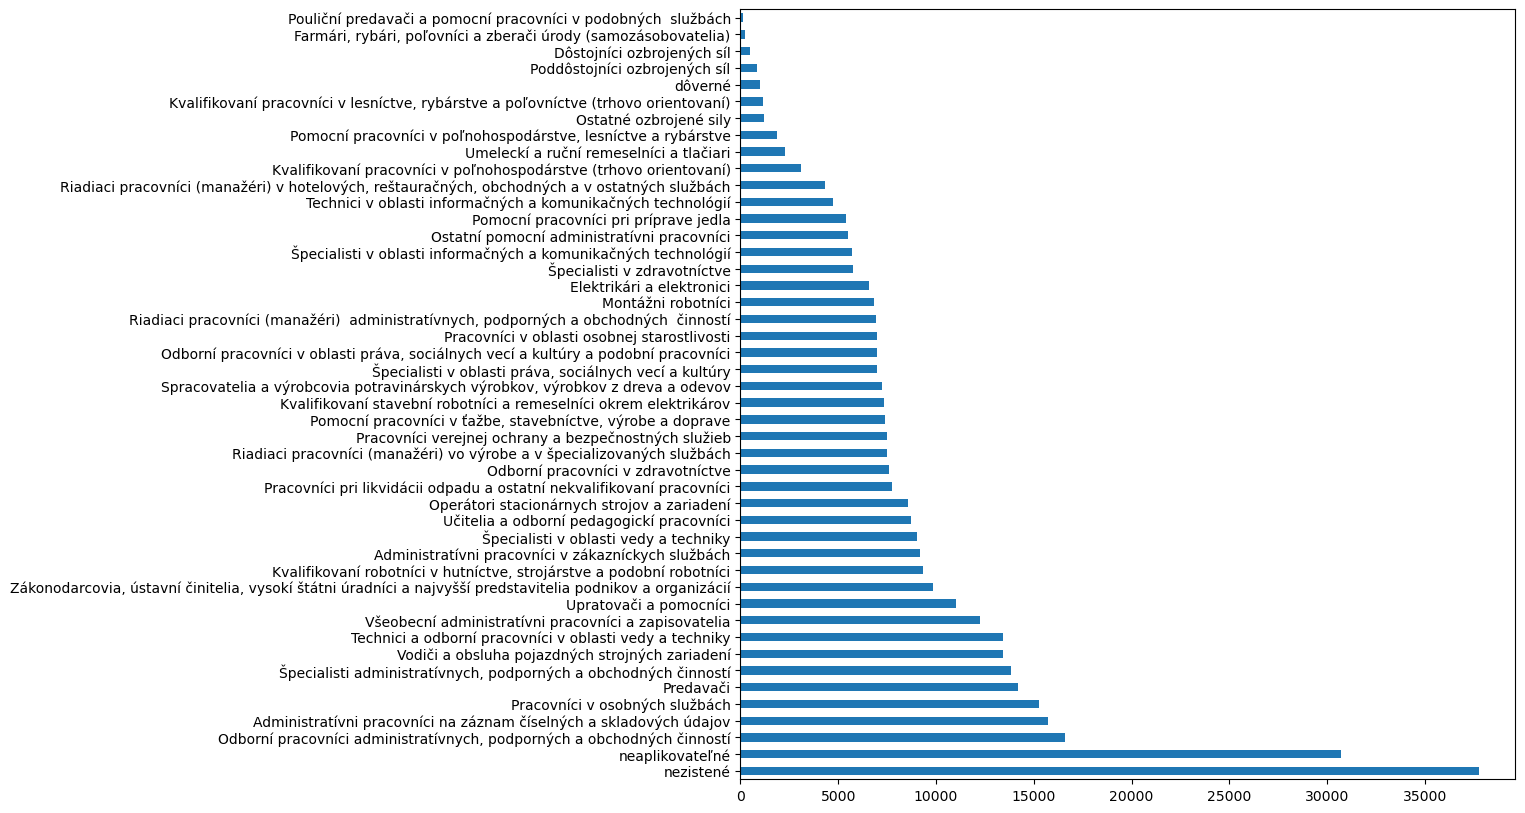

In [16]:
figure, axes = plt.subplots(figsize=(10, 10))
table4.iloc[:, 4].value_counts().plot.barh(ax=axes)

<AxesSubplot:>

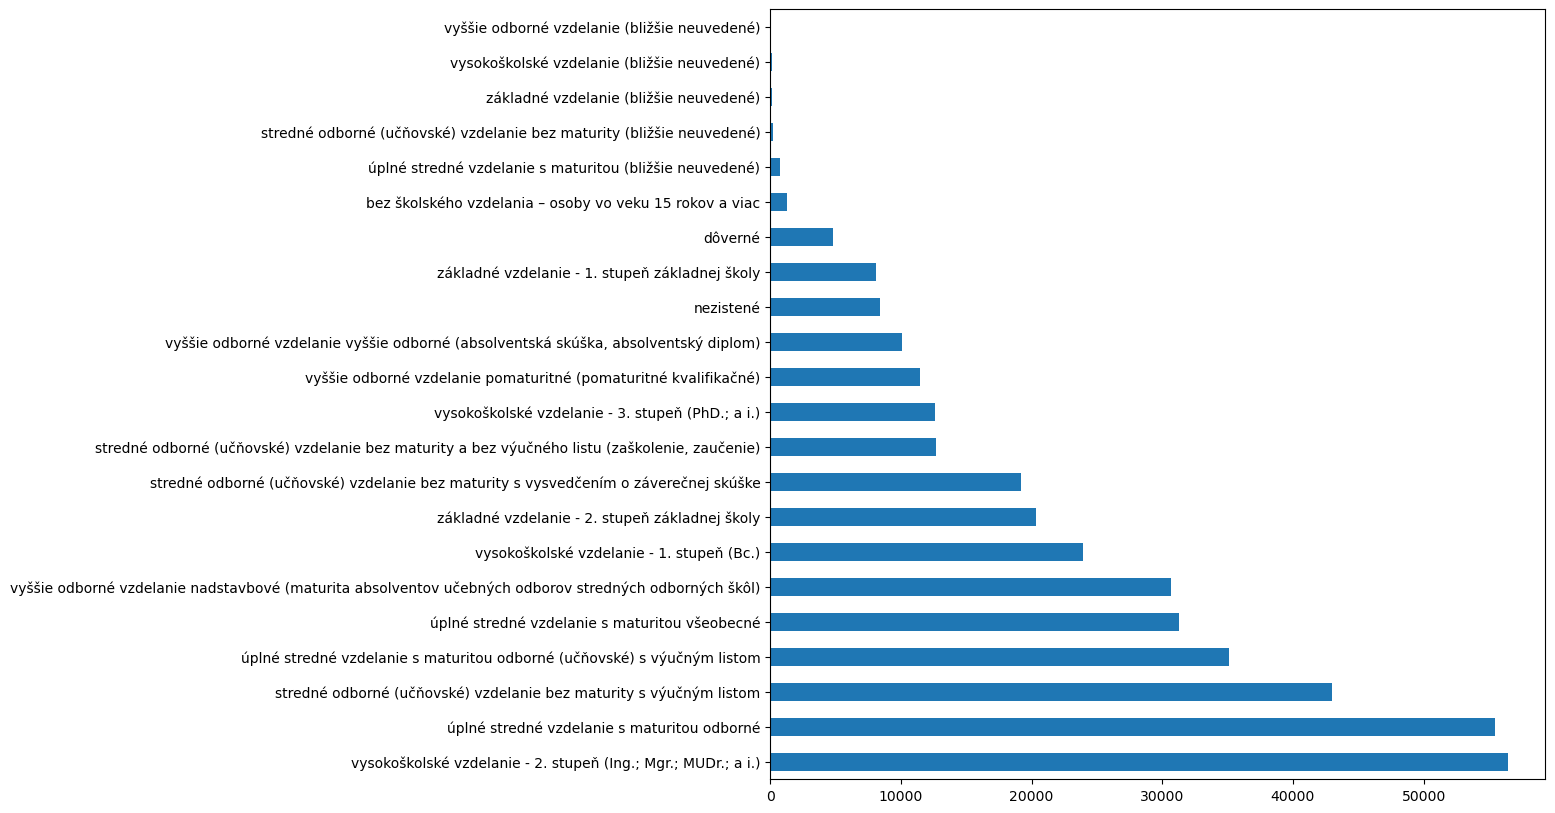

In [17]:
figure, axes = plt.subplots(figsize=(10, 10))
table4.iloc[:, 5].value_counts().plot.barh(ax=axes)

In [18]:
vyssie_zoznam = [x for x in table4.iloc[:, 5].unique() if 'vysokoškolské' in x or "vyššie" in x]
stredne_zoznam = [x for x in table4.iloc[:, 5].unique() if "stredné" in x]
ostatne_zoznam = [x for x in table4.iloc[:, 5].unique() if x not in vyssie_zoznam and x not in stredne_zoznam
                  and x != 'nezistené' and x != 'dôverné']

In [19]:
ostatne_zoznam

['základné vzdelanie - 2. stupeň základnej školy',
 'základné vzdelanie - 1. stupeň základnej školy',
 'bez školského vzdelania – osoby vo veku 15 rokov a viac',
 'základné vzdelanie (bližšie neuvedené)']

In [20]:
final_zoznam = []
counts = [0] * 5

for index, row in table4.iterrows():
    if row['Vzdelanie'] in vyssie_zoznam:
        item = 'vyššie'
        counts[0] += row['abs.']
    elif row['Vzdelanie'] in stredne_zoznam:
        item = 'stredné'
        counts[1] += row['abs.']
    elif row['Vzdelanie'] in ostatne_zoznam:
        item = 'ostatné'
        counts[2] += row['abs.']
    elif row['Vzdelanie'] == 'nezistené':
        item = 'nezistené'
        counts[3] += row['abs.']
    else:
        item = 'neaplikovateľné'
        counts[4] += row['abs.']
        
    final_zoznam.append(item)

In [21]:
counts_df = pd.DataFrame({'Druh vzdelania': ['vyššie', 'stredné', 'ostatné', 'nezistené', 'neaplikovateľné'],
                          'Počet ľudí': counts})

In [22]:
counts_df

,Druh vzdelania,Počet ľudí
0,vyššie,951829
1,stredné,1405261
2,ostatné,120730
3,nezistené,69647
4,neaplikovateľné,6424


<BarContainer object of 5 artists>

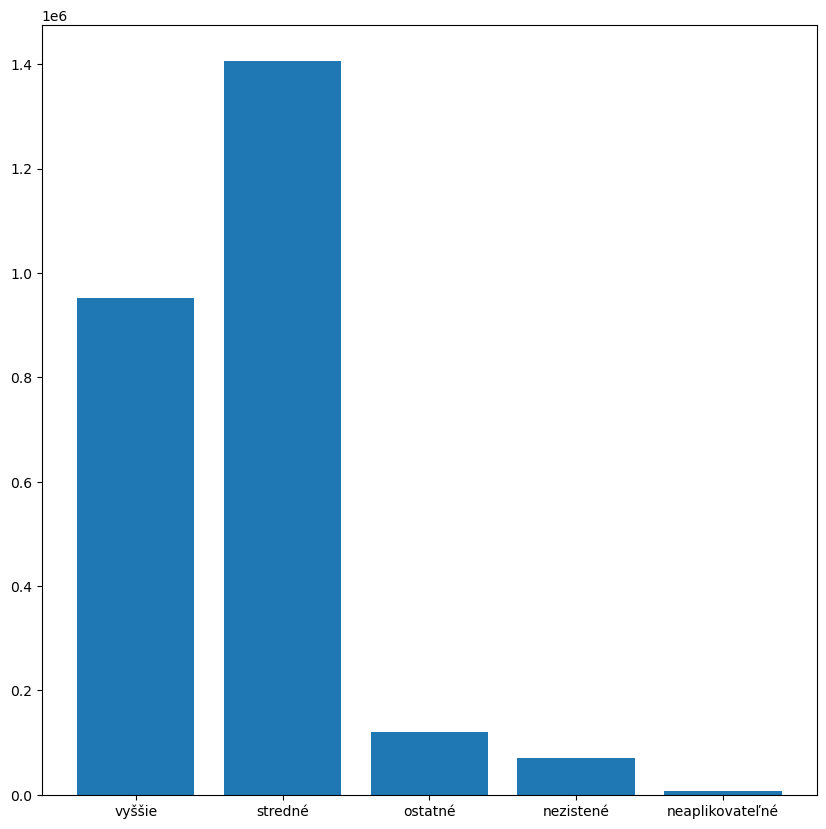

In [23]:
figure, axes = plt.subplots(figsize=(10, 10))
plt.bar(counts_df['Druh vzdelania'], counts_df['Počet ľudí'])

In [24]:
table4['Odvetvie ekonomickej činnosti​ (NACE - sekcie)'].unique()

array(['nezistené', 'Stavebníctvo',
       'Veľkoobchod a maloobchod; oprava motorových vozidiel a motocyklov',
       'Doprava a skladovanie', 'Ubytovacie a stravovacie služby',
       'Informácie a komunikácia', 'Činnosti v oblasti nehnuteľností',
       'Odborné, vedecké a technické činnosti',
       'Administratívne a podporné služby', 'Vzdelávanie',
       'Umenie, zábava a rekreácia', 'Ostatné činnosti',
       'Činnosti extrateritoriálnych organizácií a združení',
       'Poľnohospodárstvo, lesníctvo a rybolov', 'Ťažba a dobývanie',
       'Priemyselná výroba',
       'Dodávka elektriny, plynu, pary a studeného vzduchu',
       'Dodávka vody; čistenie a odvod odpadových vôd, odpady a služby odstraňovania odpadov',
       'Finančné a poisťovacie činnosti',
       'Verejná správa a obrana; povinné sociálne zabezpečenie',
       'Zdravotníctvo a sociálna pomoc',
       'Činnosti domácností ako zamestnávateľov; nediferencované činnosti v domácnostiach produkujúce tovary a služby na 

In [25]:
table4['Súčasná ekonomická aktivita'].unique()

array(['dôverné', 'pracujúci (okrem dôchodcov)', 'pracujúci dôchodca',
       'osoba na materskej dovolenke', 'osoba na rodičovskej dovolenke'],
      dtype=object)

In [26]:
table4['Odvetvie ekonomickej činnosti​ (NACE - sekcie)'].unique()

array(['nezistené', 'Stavebníctvo',
       'Veľkoobchod a maloobchod; oprava motorových vozidiel a motocyklov',
       'Doprava a skladovanie', 'Ubytovacie a stravovacie služby',
       'Informácie a komunikácia', 'Činnosti v oblasti nehnuteľností',
       'Odborné, vedecké a technické činnosti',
       'Administratívne a podporné služby', 'Vzdelávanie',
       'Umenie, zábava a rekreácia', 'Ostatné činnosti',
       'Činnosti extrateritoriálnych organizácií a združení',
       'Poľnohospodárstvo, lesníctvo a rybolov', 'Ťažba a dobývanie',
       'Priemyselná výroba',
       'Dodávka elektriny, plynu, pary a studeného vzduchu',
       'Dodávka vody; čistenie a odvod odpadových vôd, odpady a služby odstraňovania odpadov',
       'Finančné a poisťovacie činnosti',
       'Verejná správa a obrana; povinné sociálne zabezpečenie',
       'Zdravotníctvo a sociálna pomoc',
       'Činnosti domácností ako zamestnávateľov; nediferencované činnosti v domácnostiach produkujúce tovary a služby na 

In [27]:
table4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386244 entries, 0 to 386243
Data columns (total 7 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   Kód okresu                                      386244 non-null  object
 1   Názov okresu                                    386244 non-null  object
 2   Súčasná ekonomická aktivita                     386244 non-null  object
 3   Odvetvie ekonomickej činnosti​ (NACE - sekcie)  386244 non-null  object
 4   Zamestnanie (ISCO - triedy)                     386244 non-null  object
 5   Vzdelanie                                       386244 non-null  object
 6   abs.                                            386244 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 20.6+ MB


In [28]:
table2.head()

,Kód okresu,Názov okresu,Pohlavie,Vek,Vzdelanie,Súčasná ekonomická aktivita,abs.
0,SK0101,Okres Bratislava I,muž,0,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,229
1,SK0101,Okres Bratislava I,muž,1,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,263
2,SK0101,Okres Bratislava I,muž,2,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,281
3,SK0101,Okres Bratislava I,muž,3,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,270
4,SK0101,Okres Bratislava I,muž,4,bez ukončeného vzdelania – osoby vo veku 0-14 ...,dieťa do začatia povinnej školskej dochádzky,246


In [29]:
table2['Súčasná ekonomická aktivita'].unique()

array(['dieťa do začatia povinnej školskej dochádzky',
       'žiak základnej školy', 'žiak strednej školy', 'nezistené',
       'nezamestnaný', 'osoba v domácnosti',
       'pracujúci (okrem dôchodcov)', 'dôchodca', 'dôverné',
       'študent vysokej školy', 'pracujúci dôchodca',
       'príjemca kapitálových príjmov', 'iná',
       'osoba na materskej dovolenke', 'osoba na rodičovskej dovolenke'],
      dtype=object)